In [ ]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
from sklearn import tree
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("exp4.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [ ]:
df.head()

Survived  Pclass     Sex   Age     Fare
0         0       3    male  22.0   7.2500
1         1       1  female  38.0  71.2833
2         1       3  female  26.0   7.9250
3         1       1  female  35.0  53.1000
4         0       3    male  35.0   8.0500

In [ ]:
df.describe()

Survived      Pclass         Age        Fare
count  891.000000  891.000000  714.000000  891.000000
mean     0.383838    2.308642   29.699118   32.204208
std      0.486592    0.836071   14.526497   49.693429
min      0.000000    1.000000    0.420000    0.000000
25%      0.000000    2.000000   20.125000    7.910400
50%      0.000000    3.000000   28.000000   14.454200
75%      1.000000    3.000000   38.000000   31.000000
max      1.000000    3.000000   80.000000  512.329200

          Survived    Pclass       Age      Fare
Survived  1.000000 -0.338481 -0.077221  0.257307
Pclass   -0.338481  1.000000 -0.369226 -0.549500
Age      -0.077221 -0.369226  1.000000  0.096067
Fare      0.257307 -0.549500  0.096067  1.000000


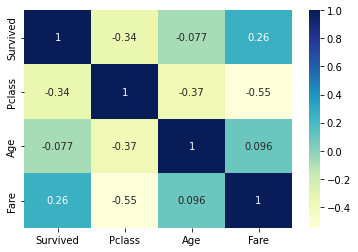

In [ ]:
print(df.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [ ]:
inputs = df.drop('Survived',axis='columns')
inputs

Pclass     Sex   Age     Fare
0         3    male  22.0   7.2500
1         1  female  38.0  71.2833
2         3  female  26.0   7.9250
3         1  female  35.0  53.1000
4         3    male  35.0   8.0500
..      ...     ...   ...      ...
886       2    male  27.0  13.0000
887       1  female  19.0  30.0000
888       3  female   NaN  23.4500
889       1    male  26.0  30.0000
890       3    male  32.0   7.7500

[891 rows x 4 columns]

In [ ]:
target = df.Survived
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [ ]:
inputs

Pclass  Sex   Age     Fare
0         3    1  22.0   7.2500
1         1    2  38.0  71.2833
2         3    2  26.0   7.9250
3         1    2  35.0  53.1000
4         3    1  35.0   8.0500
..      ...  ...   ...      ...
886       2    1  27.0  13.0000
887       1    2  19.0  30.0000
888       3    2   NaN  23.4500
889       1    1  26.0  30.0000
890       3    1  32.0   7.7500

[891 rows x 4 columns]

In [ ]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [ ]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [ ]:
inputs.Age[5]

29.69911764705882

In [ ]:
inputs.head()

Pclass  Sex   Age     Fare
0       3    1  22.0   7.2500
1       1    2  38.0  71.2833
2       3    2  26.0   7.9250
3       1    2  35.0  53.1000
4       3    1  35.0   8.0500

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [ ]:
print(X_train)
print(y_train)

     Pclass  Sex        Age      Fare
756       3    1  28.000000    7.7958
533       3    2  29.699118   22.3583
886       2    1  27.000000   13.0000
689       1    2  15.000000  211.3375
356       1    2  22.000000   55.0000
..      ...  ...        ...       ...
779       1    2  43.000000  211.3375
63        3    1   4.000000   27.9000
84        2    2  17.000000   10.5000
729       3    2  25.000000    7.9250
162       3    1  26.000000    7.7750

[712 rows x 4 columns]
756    0
533    1
886    0
689    1
356    1
      ..
779    1
63     0
84     1
729    0
162    0
Name: Survived, Length: 712, dtype: int64


In [ ]:
len(X_train)

712

In [ ]:
len(X_test)

179

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
model.score(X_test,y_test)

0.7597765363128491

In [ ]:
print(X_test)
print(y_test)


     Pclass  Sex   Age      Fare
566       3    1  19.0    7.8958
206       3    1  32.0   15.8500
744       3    1  31.0    7.9250
179       3    1  36.0    0.0000
770       3    1  24.0    9.5000
..      ...  ...   ...       ...
433       3    1  17.0    7.1250
737       1    1  35.0  512.3292
134       2    1  25.0   13.0000
424       3    1  18.0   20.2125
269       1    2  35.0  135.6333

[179 rows x 4 columns]
566    0
206    0
744    1
179    0
770    0
      ..
433    0
737    1
134    0
424    0
269    1
Name: Survived, Length: 179, dtype: int64


In [ ]:
model.predict([[3,1,20.0,15.7417]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [ ]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_1 <= 1.50
|   |--- feature_2 <= 6.50
|   |   |--- feature_3 <= 26.95
|   |   |   |--- class: 1
|   |   |--- feature_3 >  26.95
|   |   |   |--- feature_0 <= 2.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  2.50
|   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |--- feature_2 <= 3.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  3.50
|   |   |   |   |   |   |--- class: 0
|   |--- feature_2 >  6.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- feature_2 <= 53.00
|   |   |   |   |--- feature_3 <= 26.11
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  26.11
|   |   |   |   |   |--- feature_3 <= 27.14
|   |   |   |   |   |   |--- feature_3 <= 26.47
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_3 >  26.47
|   |   |   |   |   |   |   |--- feature_2 <= 46.50
|   |   |   |   |   |   |   |   |--- feature

In [ ]:
df

Survived  Pclass     Sex   Age     Fare
0           0       3    male  22.0   7.2500
1           1       1  female  38.0  71.2833
2           1       3  female  26.0   7.9250
3           1       1  female  35.0  53.1000
4           0       3    male  35.0   8.0500
..        ...     ...     ...   ...      ...
886         0       2    male  27.0  13.0000
887         1       1  female  19.0  30.0000
888         0       3  female   NaN  23.4500
889         1       1    male  26.0  30.0000
890         0       3    male  32.0   7.7500

[891 rows x 5 columns]

In [ ]:
fig = plt.figure(figsize=(200,200))
_ = tree.plot_tree(model,feature_names=["Pclass","Sex","Age","Fare"],class_names="Survived",
                   filled=True,fontsize=50)